In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
#Data visualization

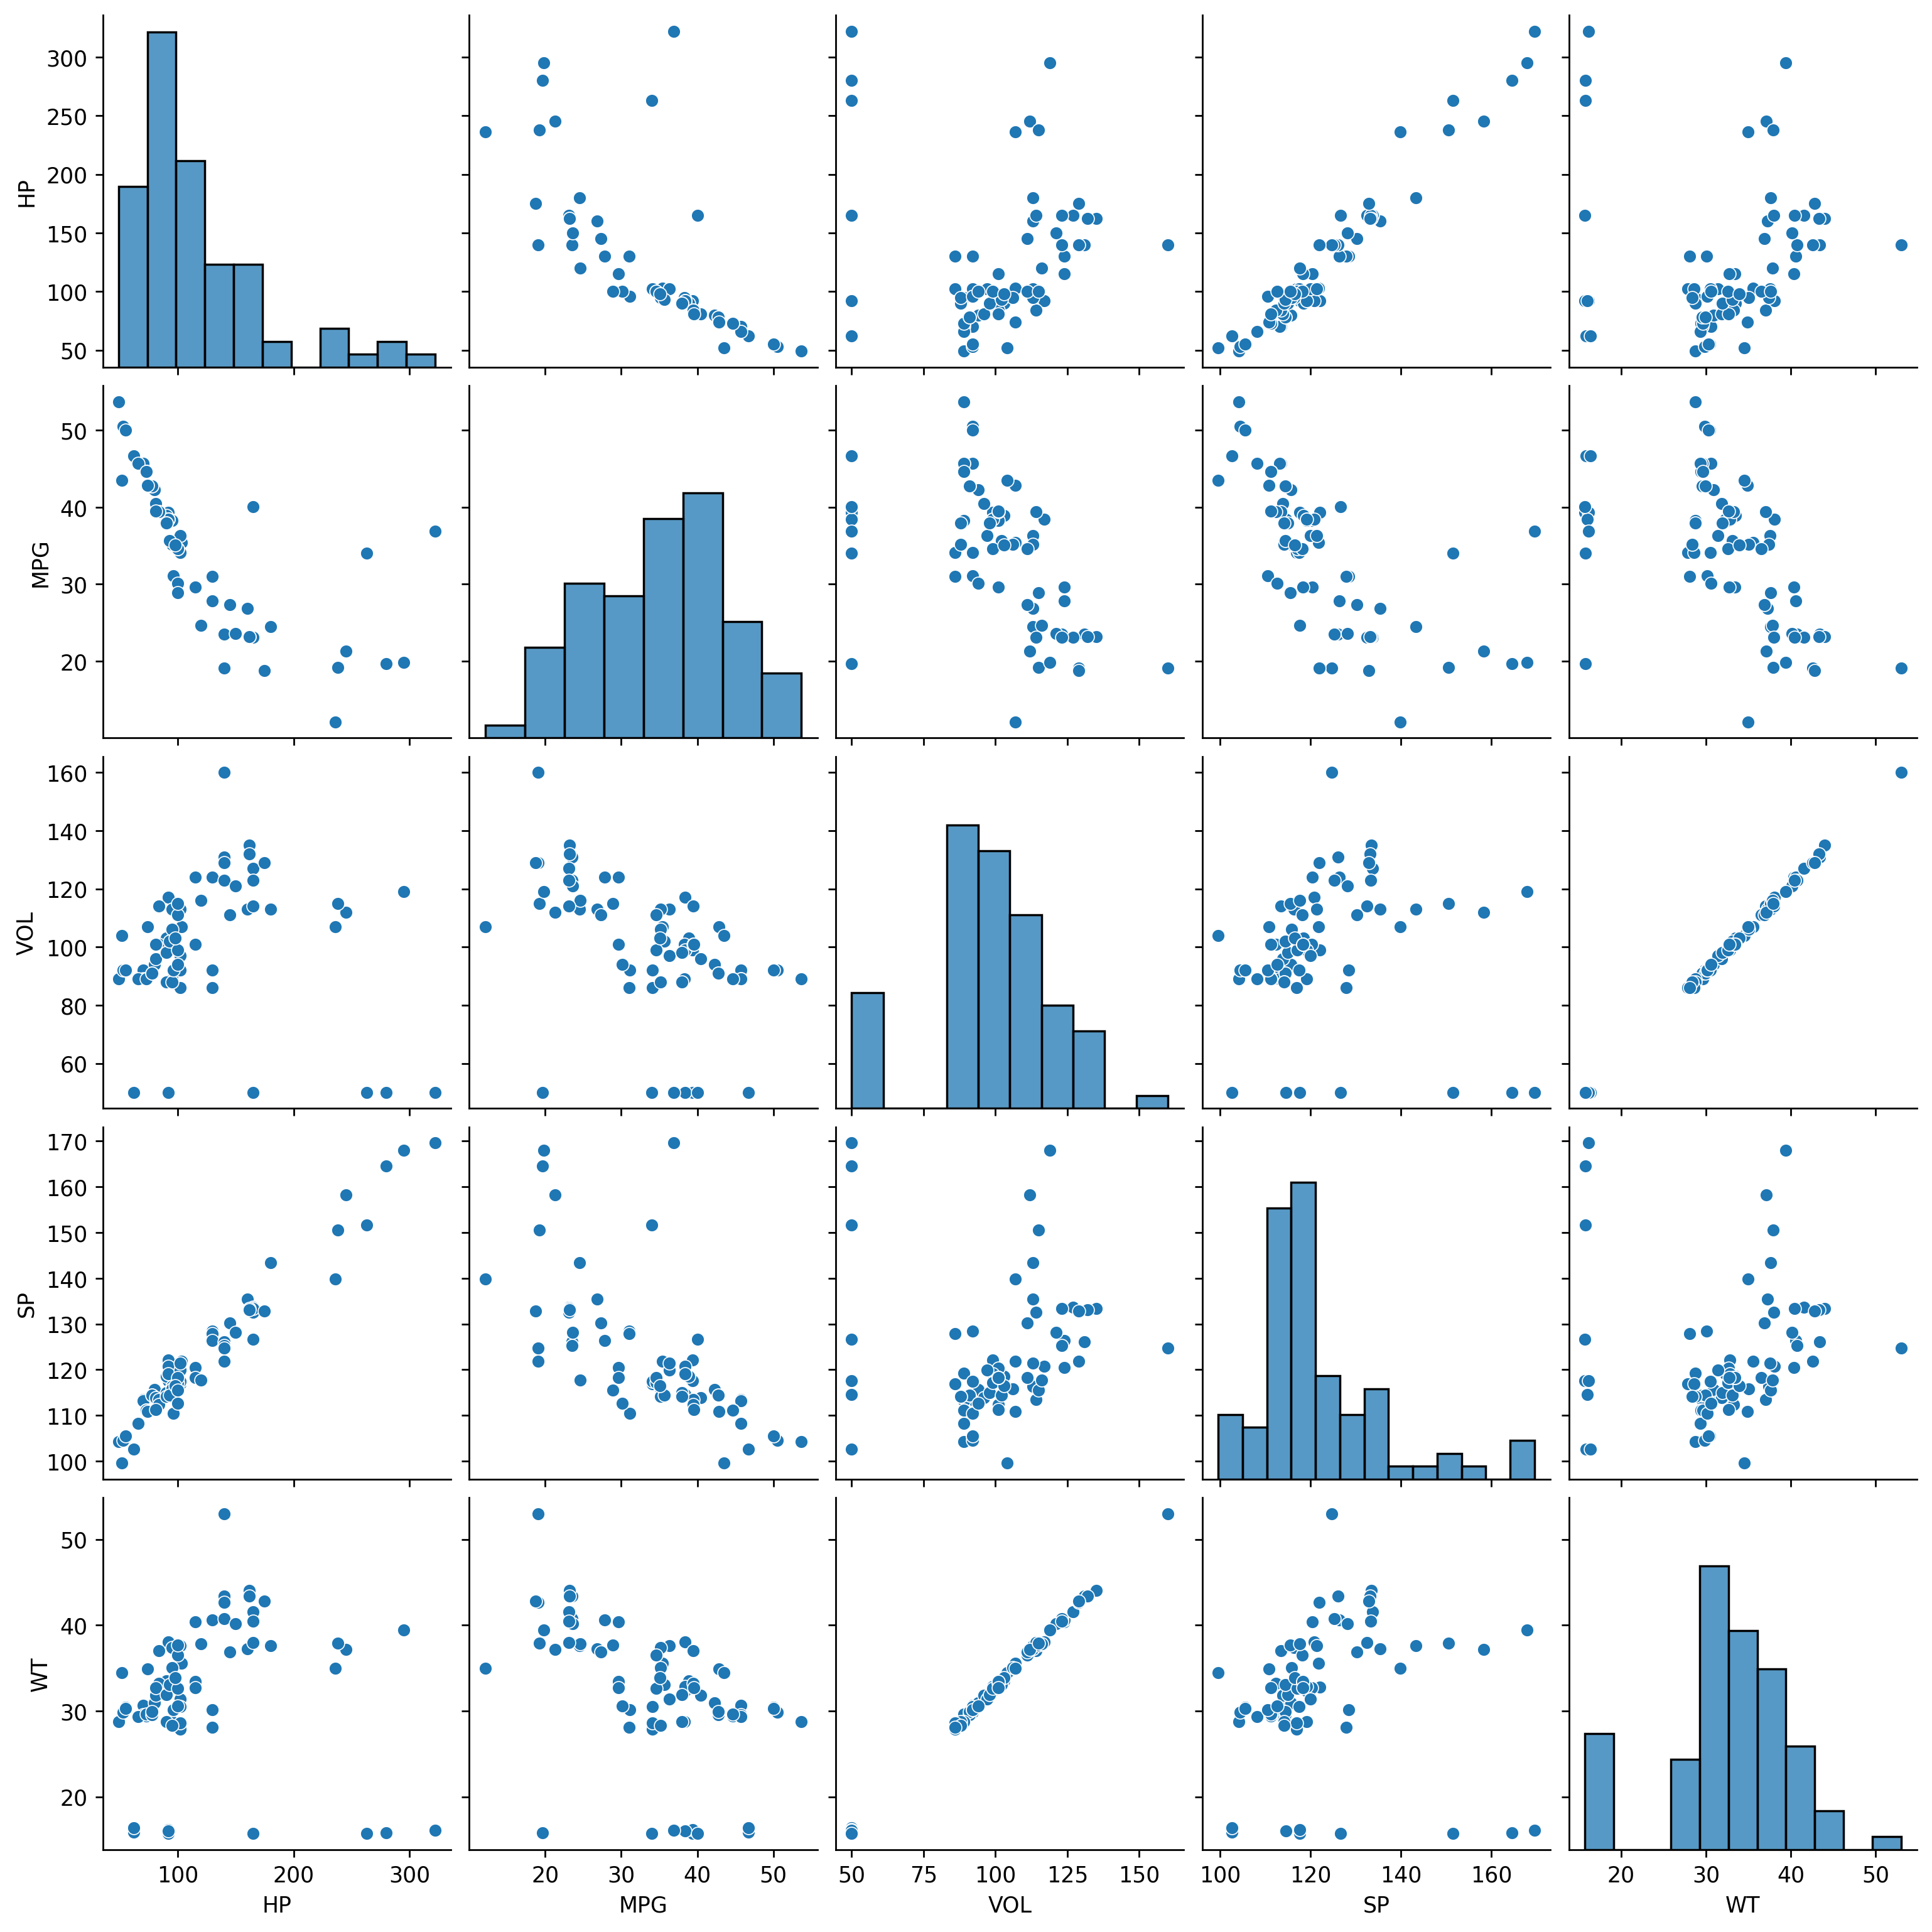

In [4]:
sns.pairplot(df)

# Model Building

In [5]:
import statsmodels.formula.api as smf

In [6]:
model = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [7]:
model.params

,0
Intercept,30.677336
HP,-0.205444
VOL,-0.336051
SP,0.395627
WT,0.400574


In [8]:
model.pvalues

,0
Intercept,0.042936
HP,0.000001
VOL,0.556294
SP,0.014579
WT,0.813649


# Linear Regression

In [9]:
#Wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.pvalues

,0
Intercept,5.053995e-02
WT,1.914892e-13
HP,7.560276e-07
SP,1.089096e-02


In [10]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.pvalues

,0
Intercept,4.194554e-02
VOL,1.648229e-13
SP,1.207855e-02
HP,8.644870e-07


# Calculate VIF

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [13]:
data = df.drop(columns=['MPG'])
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


# List comprehension

In [14]:
lst = []

for i in range(1,10):
    lst.append(i*2)

In [15]:
type(lst)
lst

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [16]:
lst_com = [i*2 for i in range(1,10)]
type(lst_com)
lst_com

[2, 4, 6, 8, 10, 12, 14, 16, 18]

#### calculate square of each number within a range of 1 to 25 and store it in a list with list comprehension method

In [17]:
sqr = [i**2 for i in range(1,26)]
sqr

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625]

In [18]:
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [19]:
vif = pd.DataFrame()  #A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.
vif

""


In [20]:
data.columns

Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

In [21]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [22]:
len(data.columns)

4

In [23]:
range(len(data.columns))

range(0, 4)

In [24]:
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [25]:
[variance_inflation_factor(data,i) for i in range(0,4)]

[11.19129601632287, 12708.789368875166, 50.54196822792541, 12172.827328054147]

In [26]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [27]:
vif

,Features,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


# Subset Selection

In [28]:
#wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared

0.769482813998346

In [29]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.rsquared

0.770368341321302

In [30]:
vol.pvalues

,0
Intercept,4.194554e-02
VOL,1.648229e-13
SP,1.207855e-02
HP,8.644870e-07


# MODEL VALIDATION TECHNIQUES

# 1.Residual Analysis


**As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.**

**NORMALITY TEST**

In [31]:
model = smf.ols('MPG~HP+VOL+SP', data=df).fit()
model.rsquared

0.770368341321302

In [32]:
#Statsmodel
import statsmodels.api as sm

In [33]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [34]:
model.fittedvalues

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544
...,...
76,21.233143
77,17.867725
78,26.216856
79,12.237554


In [35]:
model.params

,0
Intercept,29.923389
HP,-0.206705
VOL,-0.201651
SP,0.400659


In [36]:
model.resid

,0
0,10.109912
1,7.756607
2,7.756607
3,3.334825
4,8.234688
...,...
76,15.666857
77,1.330162
78,7.783144
79,7.596179


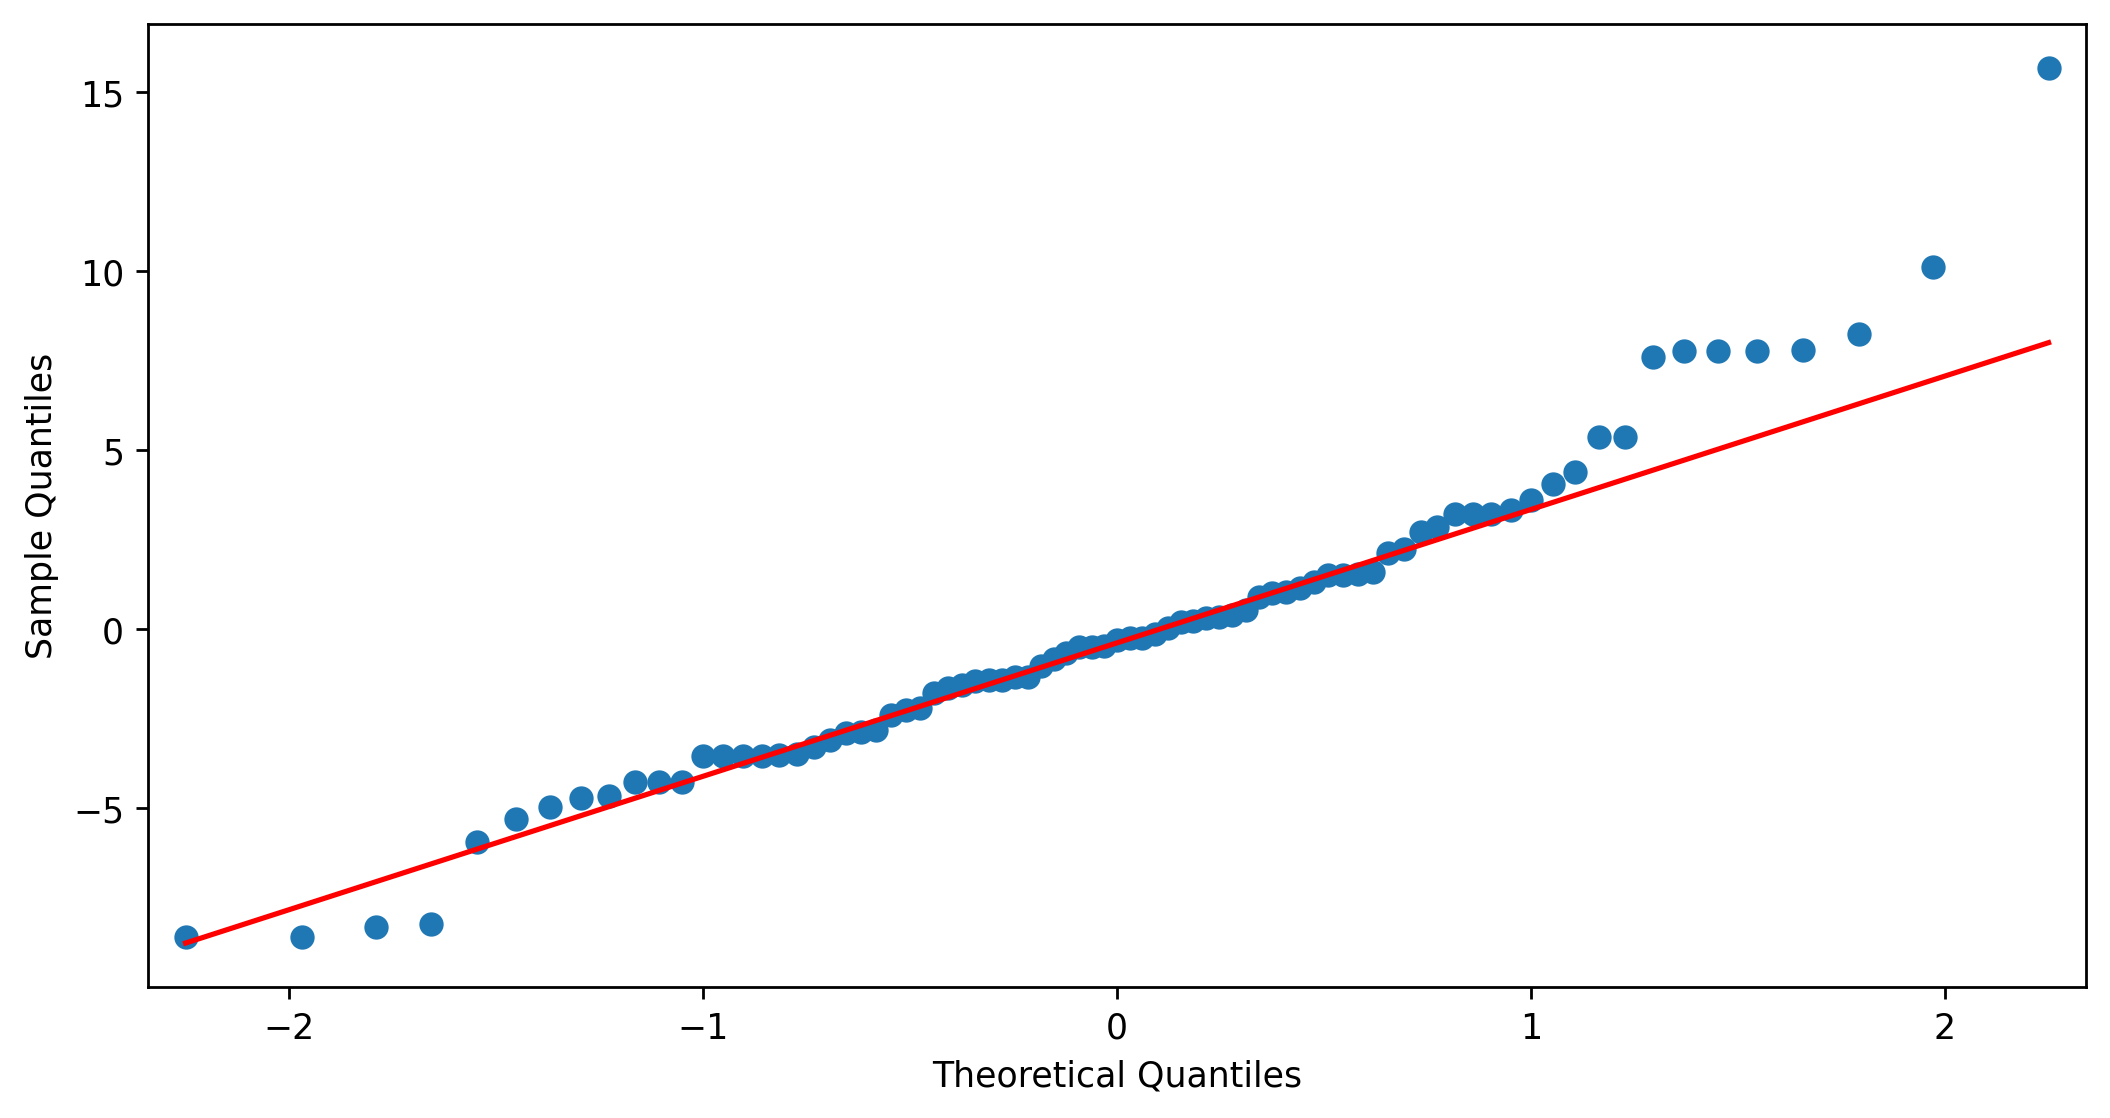

In [37]:
#Q-Q plot
sm.qqplot(model.resid,line = 'q');

In [39]:
#get index for higher residuals

In [40]:
np.argmax(model.resid), np.max(model.resid)

(76, 15.666857402852145)

# 2. Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [41]:
model.fittedvalues   #predicted values

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544
...,...
76,21.233143
77,17.867725
78,26.216856
79,12.237554


In [42]:
model.resid      #errors

,0
0,10.109912
1,7.756607
2,7.756607
3,3.334825
4,8.234688
...,...
76,15.666857
77,1.330162
78,7.783144
79,7.596179


Text(0.5, 1.0, 'Constant Variance')

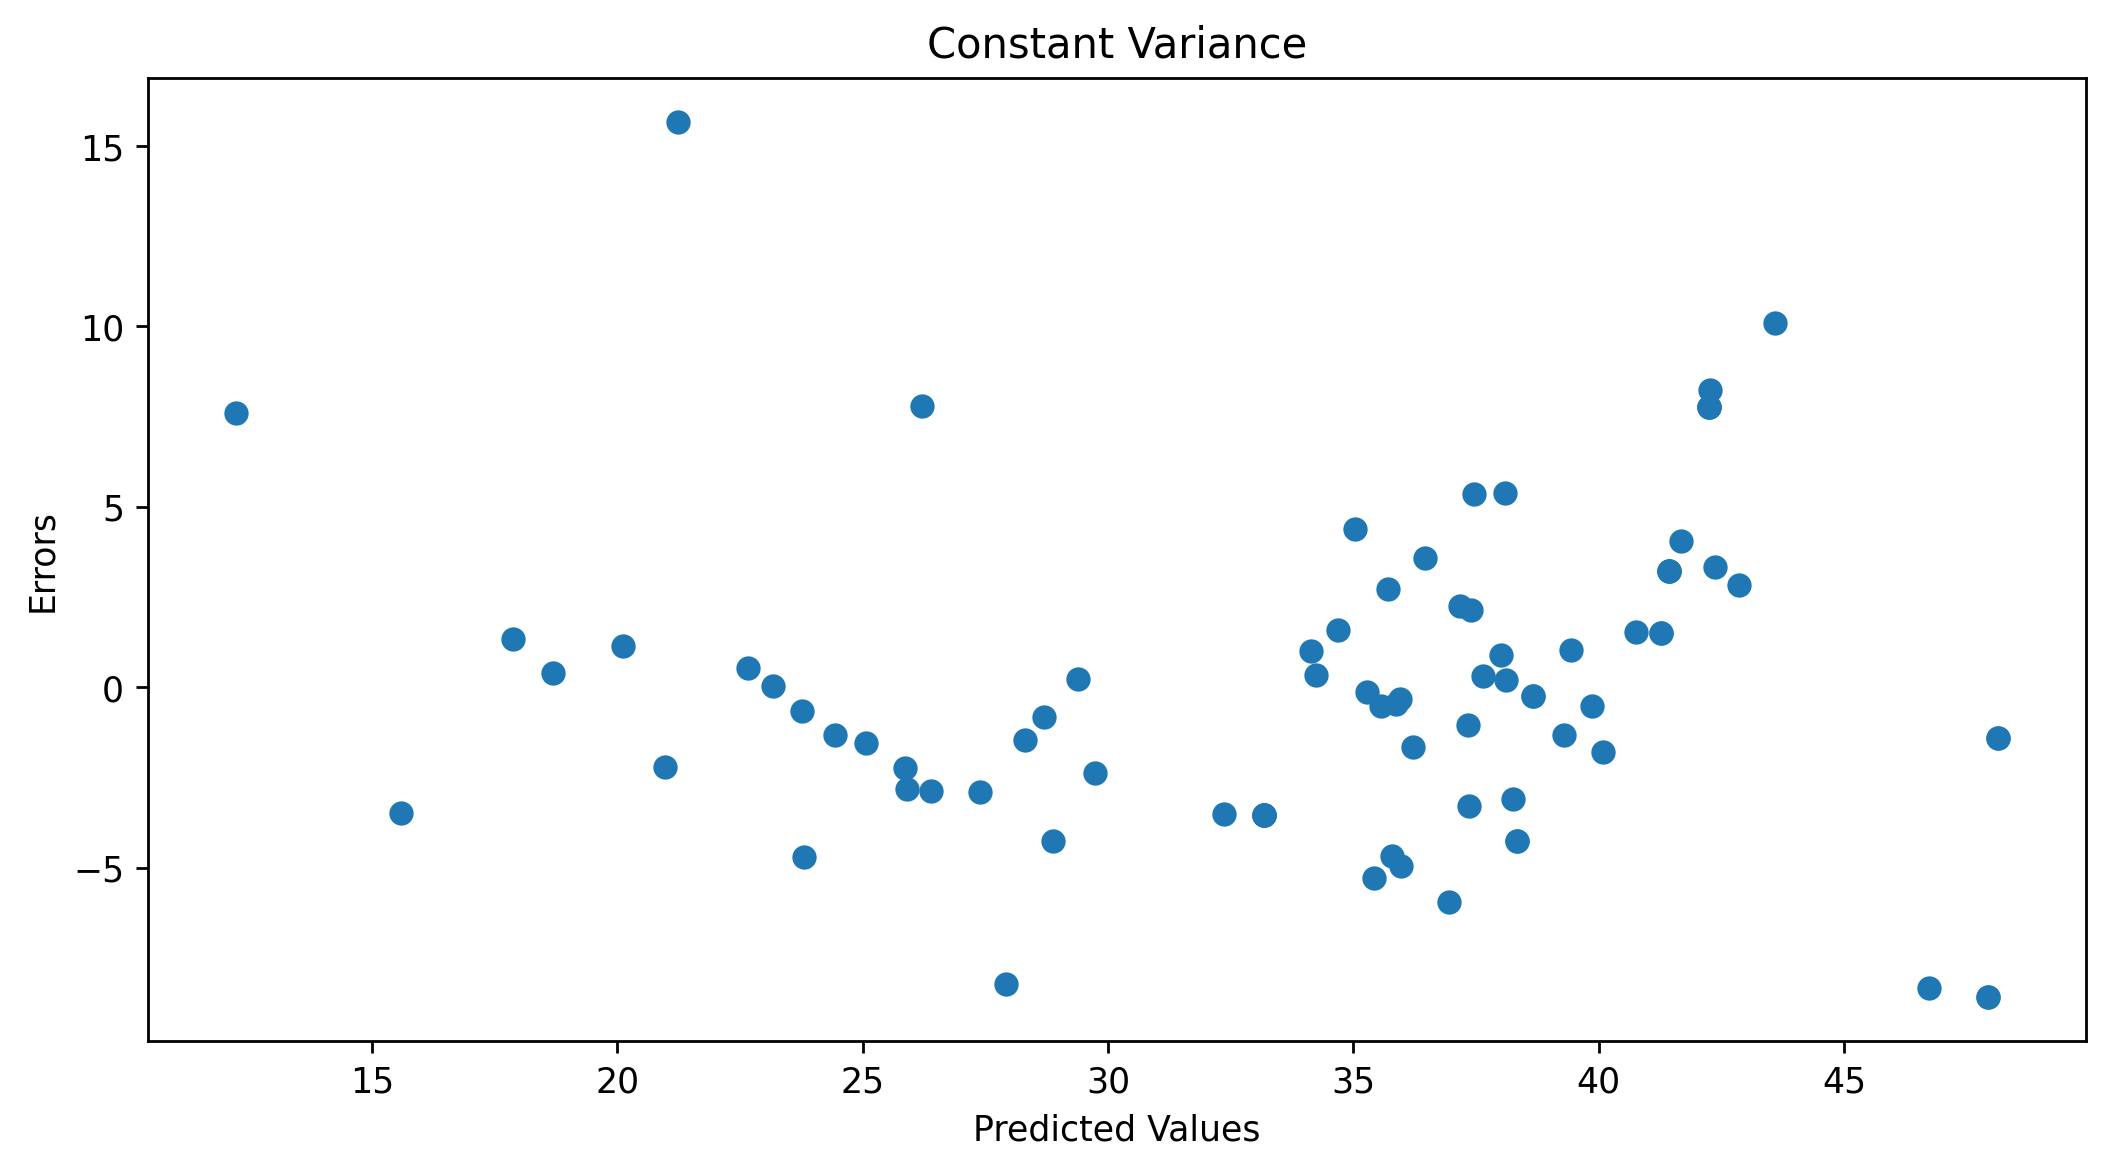

In [43]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Constant Variance')

# 3.Residual VS Regressor

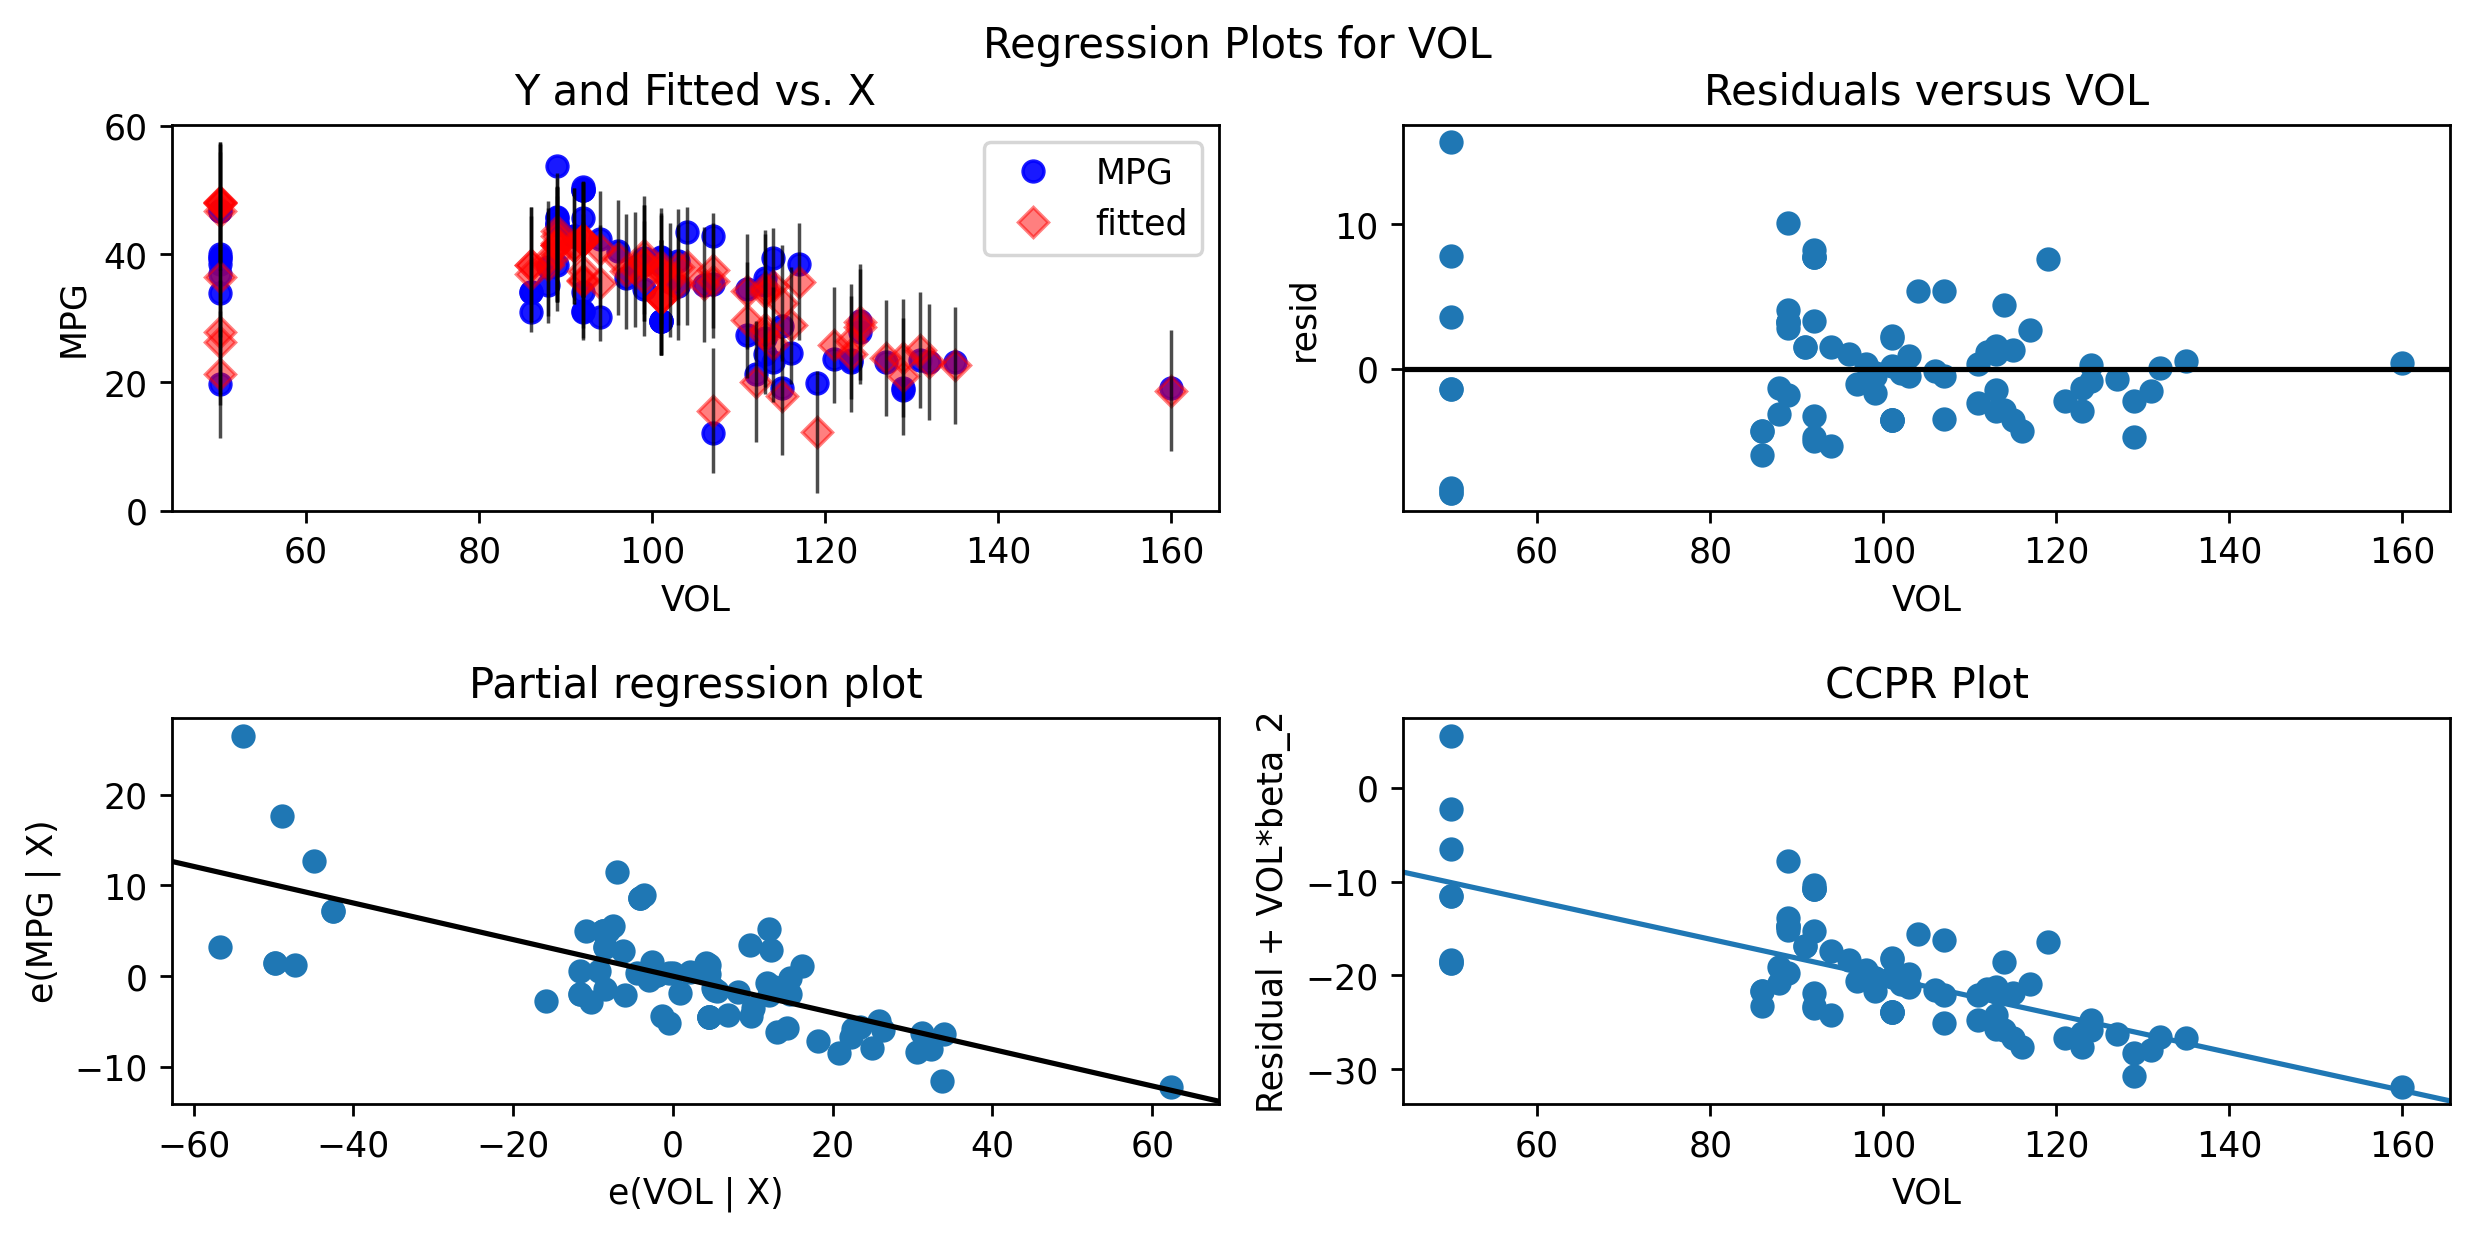

In [44]:
#Vol
sm.graphics.plot_regress_exog(model,'VOL');

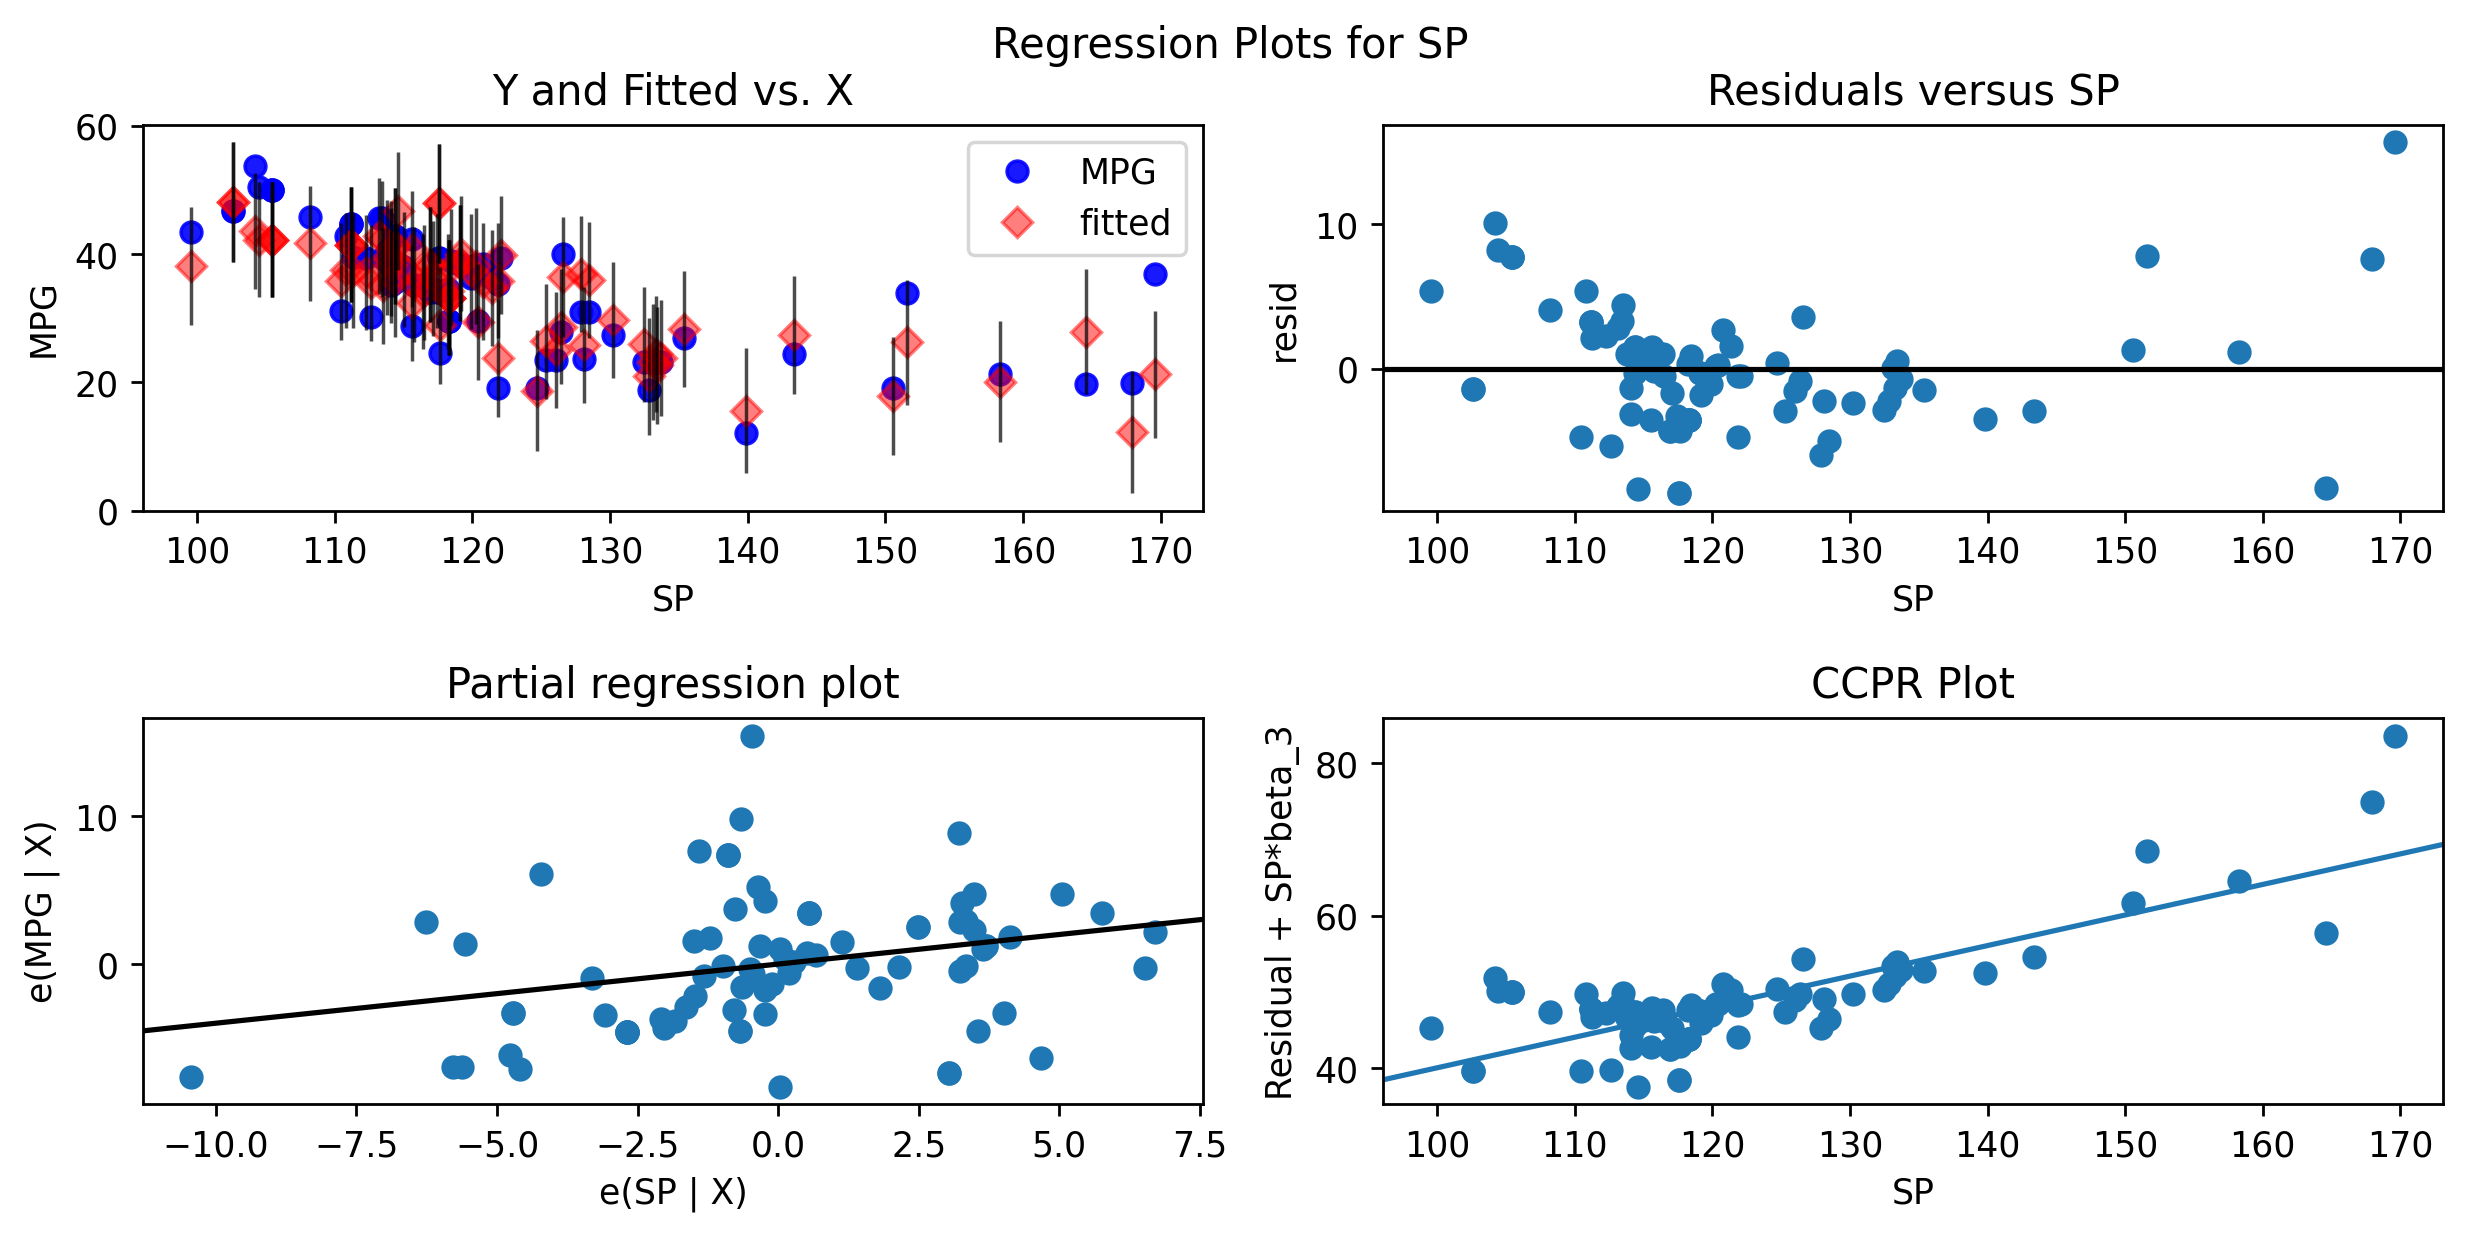

In [45]:
sm.graphics.plot_regress_exog(model,'SP');

# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [46]:
model

In [47]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [48]:
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

Text(0, 0.5, 'Cooks Distance')

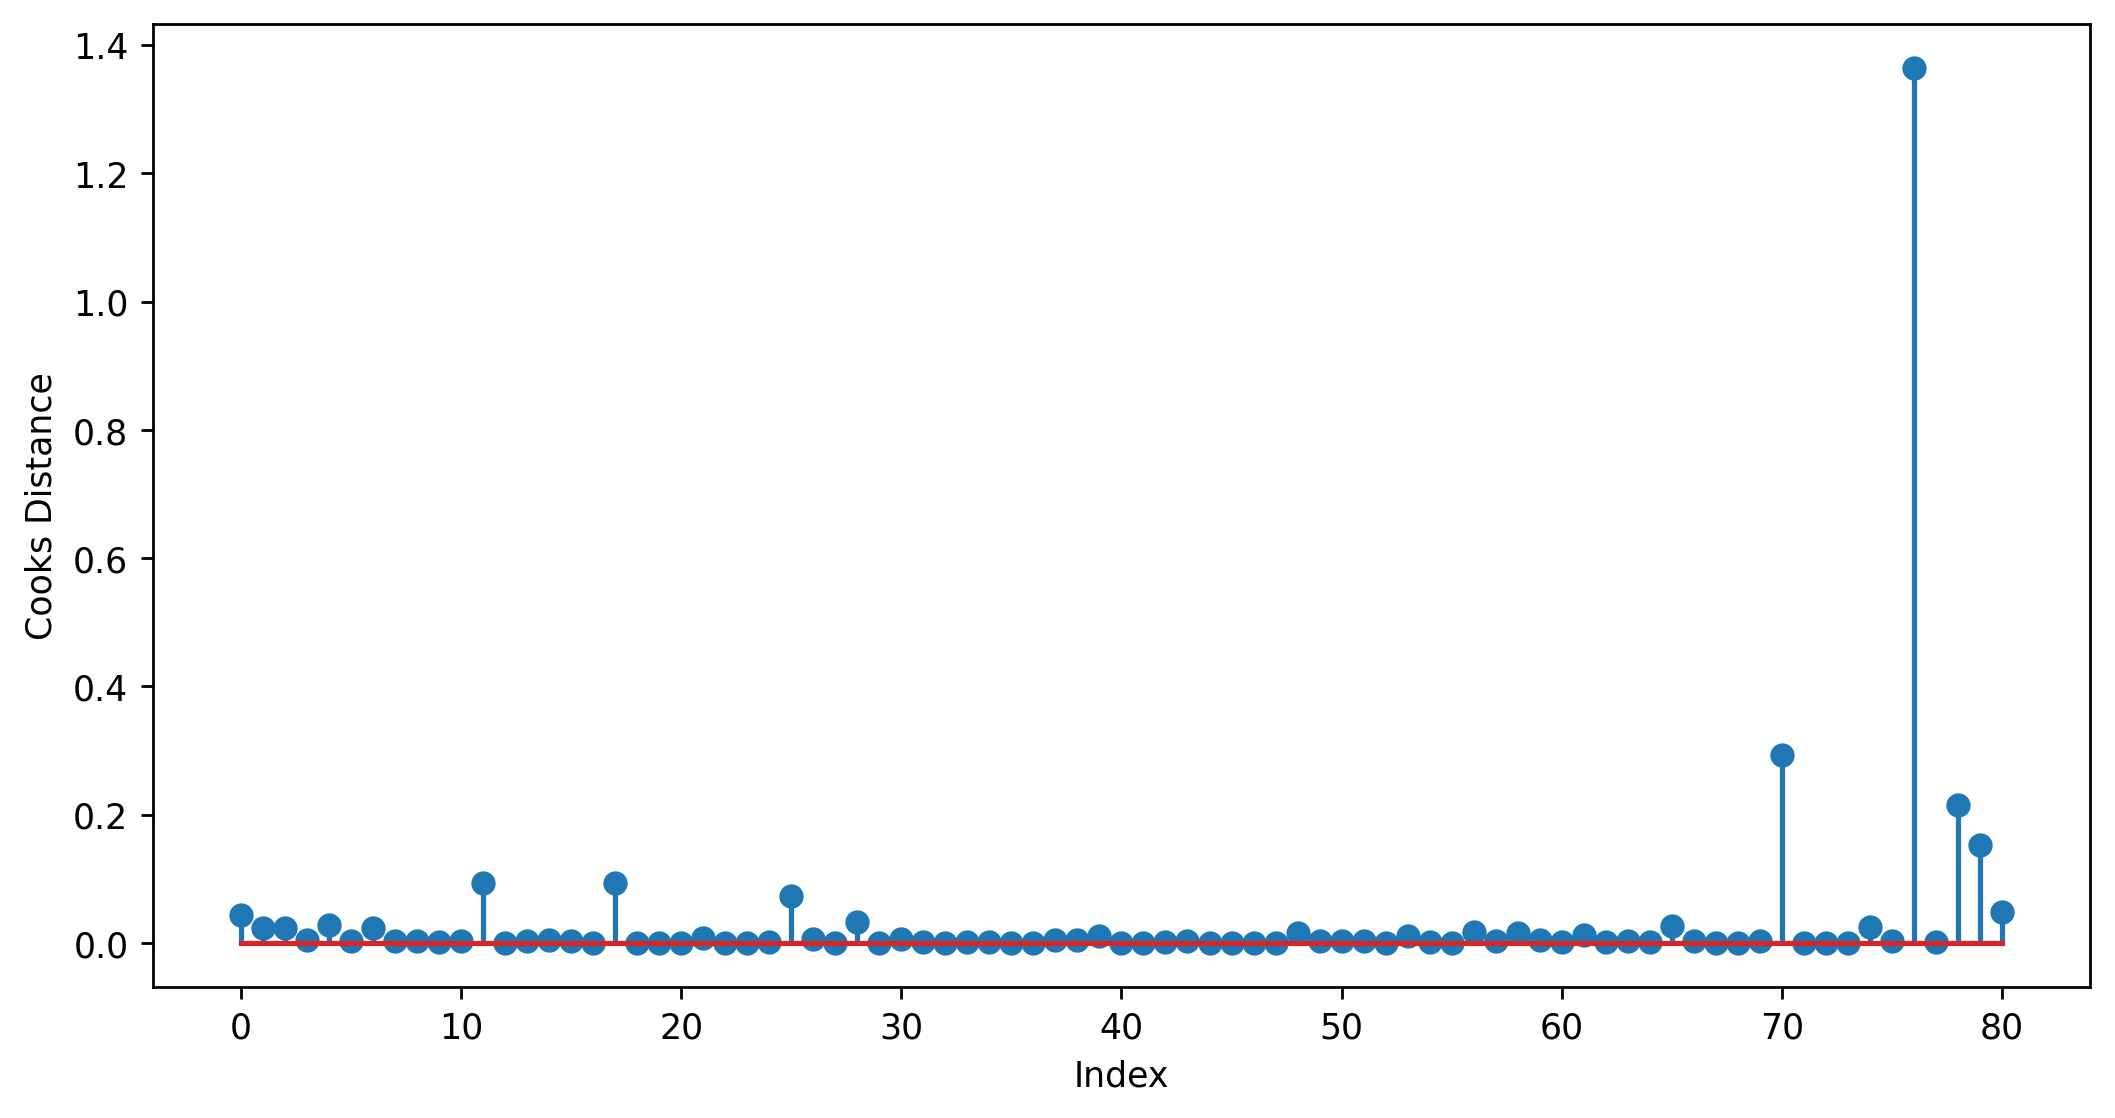

In [49]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [50]:
np.argmax(c), np.max(c)

(76, 1.3641743869103353)

In [51]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [52]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


# Improving the model

In [53]:
df.drop(index=76,inplace=True)

In [54]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
#reset the index

In [55]:
df.reset_index(inplace=True)

In [56]:
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [57]:
df.drop(columns=['index'], inplace=True)

In [58]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [59]:
final_model = smf.ols('MPG~HP+SP+VOL', data = df).fit()

In [60]:
final_model.rsquared

0.8192122305013386

**Since the value is <1 , we can stop the diagnostic process and finalize the model**

# Predicting for new records

In [61]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [62]:
test = pd.DataFrame({
    'HP' : [56,53.62,95,85,65],
    'VOL' : [92.6,85.63,75,78,65],
    'SP' : [110,112,150,110,200],
})
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150
3,85.00,78.00,110
4,65.00,65.00,200


In [63]:
final_model.params

,0
Intercept,27.755465
HP,-0.226762
SP,0.412363
VOL,-0.172856


In [64]:
final_model.predict(test)

,0
0,44.410251
1,46.979473
2,55.103295
3,40.357847
4,84.252834
